In [1]:
import os
os.chdir('..')

In [2]:
import pandas as pd
import shutil
import os
os.getcwd()


'/home/ali/tum/motion_planning/social_ai_practical_course'

In [8]:
# Create the dataset
# Filter tracks by one car
df = pd.read_csv('data/raw/inD/data/00_tracks.csv')
track_one_car = df[df['trackId']== 6]


In [10]:
from pandas.plotting import table # EDIT: see deprecation warnings below
import matplotlib.pyplot as plt

ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, df)  # where df is your data frame

plt.savefig('mytable.png')

In [7]:
df.head(len(df))

,recordingId,trackId,frame,trackLifetime,xCenter,yCenter,heading,width,length,xVelocity,yVelocity,xAcceleration,yAcceleration,lonVelocity,latVelocity,lonAcceleration,latAcceleration
0,0,0,0,0,131.38519,-34.78380,261.84968,1.76028,4.03141,-1.20819,-9.06651,-0.01047,0.52307,9.14622,-0.08938,-0.51631,0.08452
1,0,0,1,1,131.33830,-35.13993,261.95002,1.76028,4.03141,-1.20844,-9.06017,-0.01211,0.55970,9.14012,-0.07223,-0.55249,0.09037
2,0,0,2,2,131.28821,-35.50286,262.00456,1.76028,4.03141,-1.20806,-9.05198,-0.01427,0.61071,9.13202,-0.06276,-0.60279,0.09908
3,0,0,3,3,131.23861,-35.86783,262.03306,1.76028,4.03141,-1.20726,-9.04039,-0.01754,0.67524,9.12046,-0.05740,-0.66630,0.11096
4,0,0,4,4,131.18973,-36.23341,262.06697,1.76028,4.03141,-1.20636,-9.02442,-0.02230,0.75172,9.10455,-0.05069,-0.74145,0.12583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205270,0,383,24022,30,76.50065,-96.26642,30.46048,0.00000,0.00000,13.73136,7.97613,0.08649,-0.19391,15.87960,0.08578,-0.02375,0.21099
205271,0,383,24023,31,77.04926,-95.94827,30.45627,0.00000,0.00000,13.73430,7.96779,0.08599,-0.19445,15.87791,0.09328,-0.02444,0.21121
205272,0,383,24024,32,77.59813,-95.63040,30.45211,0.00000,0.00000,13.73744,7.95971,0.08581,-0.19465,15.87652,0.10069,-0.02467,0.21129
205273,0,383,24025,33,78.14712,-95.31271,30.44801,0.00000,0.00000,13.74080,7.95183,0.08579,-0.19468,15.87544,0.10805,-0.02470,0.21131


In [5]:
import matplotlib.pyplot as plt

In [6]:
df.head(10)

,recordingId,trackId,frame,trackLifetime,xCenter,yCenter,heading,width,length,xVelocity,yVelocity,xAcceleration,yAcceleration,lonVelocity,latVelocity,lonAcceleration,latAcceleration
0,0,0,0,0,131.38519,-34.78380,261.84968,1.76028,4.03141,-1.20819,-9.06651,-0.01047,0.52307,9.14622,-0.08938,-0.51631,0.08452
1,0,0,1,1,131.33830,-35.13993,261.95002,1.76028,4.03141,-1.20844,-9.06017,-0.01211,0.55970,9.14012,-0.07223,-0.55249,0.09037
2,0,0,2,2,131.28821,-35.50286,262.00456,1.76028,4.03141,-1.20806,-9.05198,-0.01427,0.61071,9.13202,-0.06276,-0.60279,0.09908
3,0,0,3,3,131.23861,-35.86783,262.03306,1.76028,4.03141,-1.20726,-9.04039,-0.01754,0.67524,9.12046,-0.05740,-0.66630,0.11096
4,0,0,4,4,131.18973,-36.23341,262.06697,1.76028,4.03141,-1.20636,-9.02442,-0.02230,0.75172,9.10455,-0.05069,-0.74145,0.12583
5,0,0,5,5,131.14137,-36.59859,262.08829,1.76028,4.03141,-1.20562,-9.00347,-0.02867,0.83827,9.08372,-0.04515,-0.82634,0.14378
6,0,0,6,6,131.09339,-36.96301,262.10699,1.76028,4.03141,-1.20524,-8.97708,-0.03663,0.93295,9.05754,-0.03894,-0.91908,0.16440
7,0,0,7,7,131.04617,-37.32605,262.09576,1.76028,4.03141,-1.20559,-8.94502,-0.04590,1.03382,9.02582,-0.03596,-1.01769,0.18764
8,0,0,8,8,130.99944,-37.68709,262.07499,1.76028,4.03141,-1.20692,-8.90729,-0.05600,1.13915,8.98863,-0.03272,-1.12055,0.21252
9,0,0,9,9,130.95149,-38.04604,262.01539,1.76028,4.03141,-1.20880,-8.86393,-0.06652,1.24738,8.94590,-0.03418,-1.22605,0.23915


In [14]:
display(df.head(10))



,recordingId,trackId,frame,trackLifetime,xCenter,yCenter,heading,width,length,xVelocity,yVelocity,xAcceleration,yAcceleration,lonVelocity,latVelocity,lonAcceleration,latAcceleration
0,0,0,0,0,131.38519,-34.78380,261.84968,1.76028,4.03141,-1.20819,-9.06651,-0.01047,0.52307,9.14622,-0.08938,-0.51631,0.08452
1,0,0,1,1,131.33830,-35.13993,261.95002,1.76028,4.03141,-1.20844,-9.06017,-0.01211,0.55970,9.14012,-0.07223,-0.55249,0.09037
2,0,0,2,2,131.28821,-35.50286,262.00456,1.76028,4.03141,-1.20806,-9.05198,-0.01427,0.61071,9.13202,-0.06276,-0.60279,0.09908
3,0,0,3,3,131.23861,-35.86783,262.03306,1.76028,4.03141,-1.20726,-9.04039,-0.01754,0.67524,9.12046,-0.05740,-0.66630,0.11096
4,0,0,4,4,131.18973,-36.23341,262.06697,1.76028,4.03141,-1.20636,-9.02442,-0.02230,0.75172,9.10455,-0.05069,-0.74145,0.12583
5,0,0,5,5,131.14137,-36.59859,262.08829,1.76028,4.03141,-1.20562,-9.00347,-0.02867,0.83827,9.08372,-0.04515,-0.82634,0.14378
6,0,0,6,6,131.09339,-36.96301,262.10699,1.76028,4.03141,-1.20524,-8.97708,-0.03663,0.93295,9.05754,-0.03894,-0.91908,0.16440
7,0,0,7,7,131.04617,-37.32605,262.09576,1.76028,4.03141,-1.20559,-8.94502,-0.04590,1.03382,9.02582,-0.03596,-1.01769,0.18764
8,0,0,8,8,130.99944,-37.68709,262.07499,1.76028,4.03141,-1.20692,-8.90729,-0.05600,1.13915,8.98863,-0.03272,-1.12055,0.21252
9,0,0,9,9,130.95149,-38.04604,262.01539,1.76028,4.03141,-1.20880,-8.86393,-0.06652,1.24738,8.94590,-0.03418,-1.22605,0.23915


In [ ]:

# Save it
track_vis_path = 'data/processed/visualization_data/ground_truth/00_tracks.csv'
track_one_car.to_csv(track_vis_path)

# Filter tracksMeta by one car
tracks_meta = pd.read_csv('data/raw/inD/data/00_tracksMeta.csv')
tracks_meta_new = tracks_meta[tracks_meta['trackId'] == 6]
tracks_meta_new.to_csv('data/processed/visualization_data/ground_truth/00_tracksMeta.csv')

# Copying Meta data
background_path = 'data/raw/inD/data/00_background.png'
recording_meat_path = 'data/raw/inD/data/00_recordingMeta.csv'
dst_path = 'data/processed/visualization_data/ground_truth'
dst_path_pred = 'data/processed/visualization_data/predicted'

shutil.copy(background_path, dst_path)
shutil.copy(recording_meat_path, dst_path)
shutil.copy(background_path, dst_path_pred)
shutil.copy(recording_meat_path, dst_path_pred)


In [8]:

def get_columns(file_dir):
    print(file_dir)
    df = pd.read_csv(file_dir)

    # get the columns
    s_x = df['xCenter'].values
    s_y = df['yCenter'].values
    v_x = df['xVelocity'].values
    v_y = df['yVelocity'].values
    a_x = df['xAcceleration'].values
    a_y = df['yAcceleration'].values

    return s_x , s_y , v_x , v_y , a_x , a_y




In [9]:

s_x, s_y, v_x, v_y, a_x, a_y = get_columns(track_vis_path)

data/processed/visualization_data/ground_truth/00_tracks.csv


In [10]:
# Predict the dataset

In [11]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from src.utils.column_import import columns
from config.settings import saved_models_path
from src.utils.create_figure import evaluate_and_save






/home/ali/tum/motion_planning/social_ai_practical_course/data/processed/inD/x_y_recording_00_range_384.csv
/home/ali/tum/motion_planning/social_ai_practical_course/data/processed/scenario_samples/lane_merging/dif_set/test_set_00.csv


## Load models 

In [12]:
# Load the models
def load_model(model_name):
    model_file_path = os.path.join(saved_models_path, f'acceleration_model_4/{model_name}.pkl')
    
    if os.path.exists(model_file_path):
        with open(model_file_path, 'rb') as file:
            loaded_model = pickle.load(file)
        
        print(f'Model "{model_name}" loaded from: {model_file_path}')
        return loaded_model
    else:
        print(f'Model file not found for "{model_name}"')
        print(model_file_path)
        return None

loaded_first_model = load_model('first_model')
loaded_second_model = load_model('second_model')


Model "first_model" loaded from: /home/ali/tum/motion_planning/social_ai_practical_course/results/models/acceleration_model_4/first_model.pkl
Model "second_model" loaded from: /home/ali/tum/motion_planning/social_ai_practical_course/results/models/acceleration_model_4/second_model.pkl


## Load the coefficients

In [13]:
# Get the coefficients
c_1_overline = loaded_first_model.coef_[0]
c_3_overline = loaded_first_model.coef_[1]
c_2_overline = loaded_second_model.coef_[0]
c_4_overline = loaded_second_model.coef_[1]

print(f'C̅₁: {c_1_overline}')
print(f'C̅₂: {c_2_overline}')
print(f'C̅₃: {c_3_overline}')
print(f'C̅₄: {c_4_overline}')

C̅₁: -0.9950972669344402
C̅₂: -0.9953676177962907
C̅₃: 0.00044557523673135216
C̅₄: 0.0002079907476514545


Rearange the constants:
\begin{align}
c_2 =  \frac{1}{\overline c_2}
\\ c_1 = \overline c_1  \overline c_2
\\ c_4 = \frac{1}{\overline c_4}
\\ c_3 = \overline c_3 \overline c_4
\end{align}



In [14]:
# Rearange the coefficients
c_1 = c_1_overline * c_2_overline
c_2 = 1 / c_2_overline
c_3 = c_3_overline * c_4_overline
c_4 = 1 / c_4_overline

print(f'c₁: {c_1}')
print(f'c₂: {c_2}')
print(f'c₃: {c_3}')
print(f'c₄: {c_4}')

c₁: 0.9904875960641334
c₂: -1.0046539410373478
c₃: 9.267552662272776e-08
c₄: 4807.9061751139725


# Integration method

Now we put the constants into our integration model and test it on accuracy
\begin{align}
v(k+1) &= v(k) + c_1 a(k) + c_2(k-1)\\
s(k+1) &= s(k) + dt  \ v(k)+ c_3 a(k) + c_4 a(k-1)
\end{align}

We have to split each entry into its x- and y-components
\begin{align}
v_x(k+1)    &= v_x(k) + c_1 a_x(k)  +  c_2a_x(k-1)
\\ v_y(k+1) &= v_y(k) + c_1 a_y(k)  + c_2 a_y(k-1)
\\ s_x(k+1) &= s_x(k) + dt  \ v_x(k)+ c_3 a_x(k) + c_4 a_x(k-1)
\\ s_y(k+1) &= s_y(k) + dt \ v_y(k) + c_3 a_y(k) + c_4 a_y(k-1)
\end{align}




In [15]:
# Index shifting:
# k-1         k           k+1
# 0:-2         1:-1        2:


In [16]:
dt = 0.04
dt = 1
s_x_pred = s_x[1:-1] + dt * v_x[1:-1] + c_3 * a_x[1:-1] + c_4 * a_x[0:-2]
s_y_pred = s_y[1:-1] + dt * v_y[1:-1] + c_3 * a_y[1:-1] + c_4 * a_y[0:-2]


v_x_pred = v_x[1:-1] + c_1 * a_x[1:-1] + c_2 * a_x[0:-2]
v_y_pred = v_y[1:-1] + c_1 * a_y[1:-1] + c_2 * a_y[0:-2]



## Evaluation


In [17]:
def evaluate(y_test, y_pred):
    # Visualize the results

    plt.figure(figsize=(8, 4))
    # Evaluate the model using various metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print the results in scientific notation
    print(f'Mean Squared Error (MSE): {mse:.4e}')
    print(f'Mean Absolute Error (MAE): {mae:.4e}')
    print(f'R-squared (R²) Score: {r2:.4e}')


    plt.scatter(y_test, y_pred)

    # Scatter plot of actual vs. predicted values with locus (line of identity)
    plt.subplot(1, 2, 1)
    plt.scatter(y_test, y_pred)

    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Locus
    plt.title('Actual vs. Predicted Values')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')

    # Residual plot
    plt.subplot(1, 2, 2)
    residuals = y_test - y_pred
    plt.scatter(y_pred, residuals)
    plt.title('Residual Plot')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0

    plt.tight_layout()
    plt.show()
 

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate(y_test, y_pred, title):
    
    # Evaluate the model using various metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print the results in scientific notation
    print(f'Mean Squared Error (MSE): {mse:.4e}')
    print(f'Mean Absolute Error (MAE): {mae:.4e}')
    print(f'R-squared (R²) Score: {r2:.4e}')

    # Create a scatter plot
    plt.scatter(y_test, y_pred, alpha=0.7)

    # Add a diagonal line for reference (perfect prediction)
    min_val = min(np.min(y_test), np.min(y_pred))
    max_val = max(np.max(y_test), np.max(y_pred))
    plt.plot([min_val, max_val], [min_val, max_val], linestyle='--', color='red', linewidth=2, label='Perfect Prediction')

    # Add labels and title
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(title)

    # Set aspect ratio to be equal
    plt.gca().set_aspect('equal', adjustable='box')

    # Show legend
    plt.legend()

    plt.gcf().set_size_inches(7,7)  # Adjust the size as needed


    # Show the plot
    plt.show()



Mean Squared Error (MSE): 3.5133e+07
Mean Absolute Error (MAE): 4.6576e+03
R-squared (R²) Score: -4.7898e-01


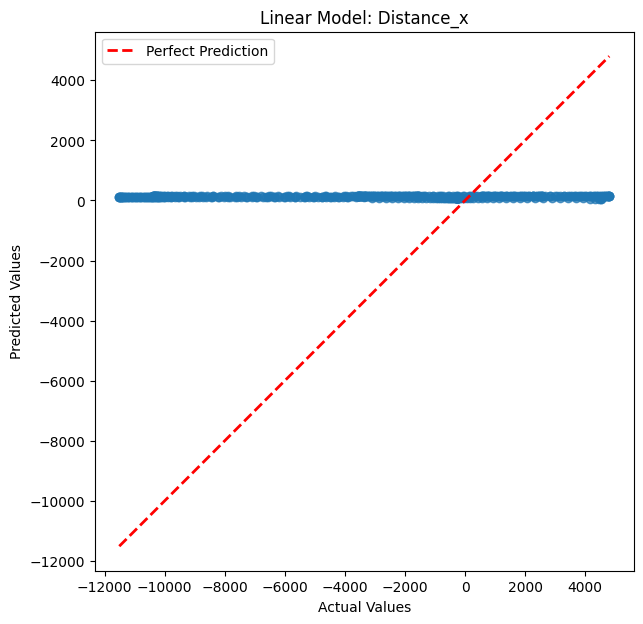

Mean Squared Error (MSE): 2.8339e+07
Mean Absolute Error (MAE): 4.4255e+03
R-squared (R²) Score: -4.0268e-02


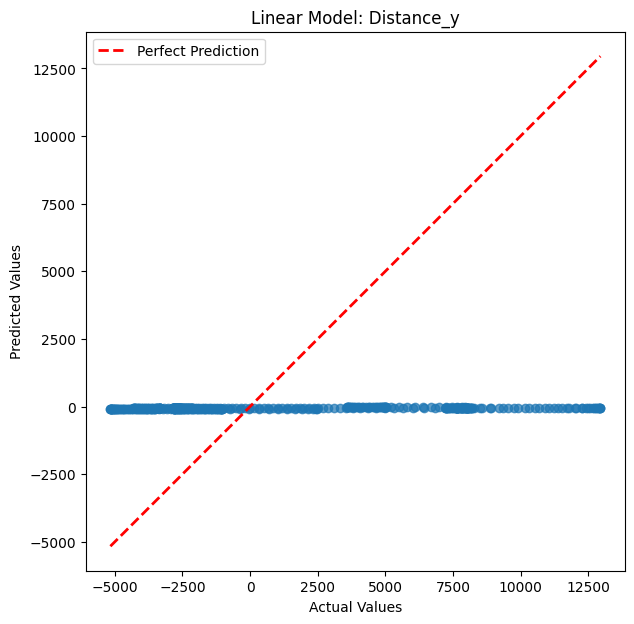

Mean Squared Error (MSE): 6.2512e-03
Mean Absolute Error (MAE): 6.3725e-02
R-squared (R²) Score: 9.9970e-01


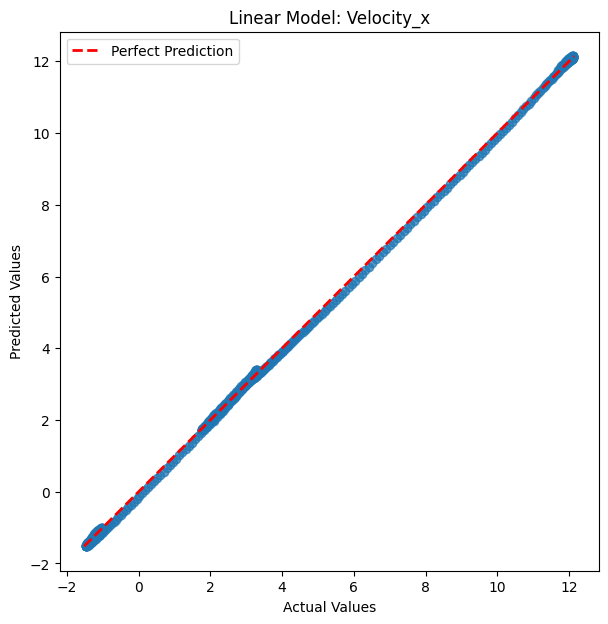

Mean Squared Error (MSE): 4.4693e-03
Mean Absolute Error (MAE): 5.2822e-02
R-squared (R²) Score: 9.9946e-01


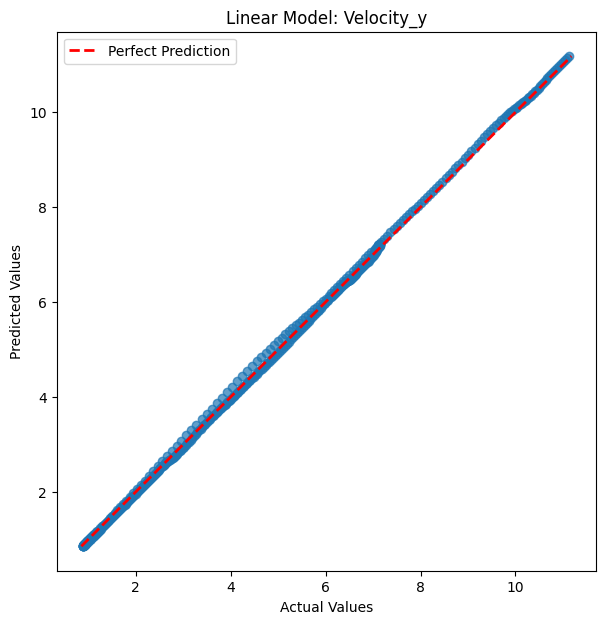

In [19]:

evaluate(s_x_pred, s_x[2:], 'Linear Model: Distance_x')
evaluate(s_y_pred, s_y[2:], 'Linear Model: Distance_y')
evaluate(v_x_pred, v_x[2:], 'Linear Model: Velocity_x')
evaluate(v_y_pred, v_y[2:], 'Linear Model: Velocity_y')


In [20]:
df = pd.read_csv(track_vis_path)
df.head()

df_new = df.iloc[:-2]
df_new['xCenter'] = s_x_pred 
df_new['yCenter'] = s_y_pred 
df_new['xVelocity'] = v_x_pred 
df_new['yVelocity'] = v_y_pred 
df_new.head()





df_new.to_csv('data/processed/visualization_data/predicted/00_tracks.csv')


,Unnamed: 0,recordingId,trackId,frame,trackLifetime,xCenter,yCenter,heading,width,length,xVelocity,yVelocity,xAcceleration,yAcceleration,lonVelocity,latVelocity,lonAcceleration,latAcceleration
0,50129,0,6,3,0,62.05889,-105.25181,31.80314,1.89383,4.76592,11.66718,7.00029,0.92463,0.53494,13.60468,0.19934,1.06772,0.03266
1,50130,0,6,4,1,62.52378,-104.97361,31.77880,1.89383,4.76592,11.71747,7.03439,0.92381,0.52509,13.66548,0.19105,1.06186,0.04014
2,50131,0,6,5,2,62.99456,-104.69123,31.74890,1.89383,4.76592,11.76718,7.06787,0.90996,0.50266,13.72547,0.18161,1.03830,0.05138
3,50132,0,6,6,3,63.46960,-104.40564,31.72300,1.89383,4.76592,11.81490,7.09946,0.88407,0.46825,13.78274,0.17363,0.99820,0.06656
4,50133,0,6,7,4,63.94787,-104.11844,31.69201,1.89383,4.76592,11.85959,7.12853,0.84786,0.42293,13.83614,0.16491,0.94362,0.08556
